In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/phishing (1).csv")
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,NonStdPort,HTTPSDomainURL,RequestURL,AnchorURL,LinksInScriptTags,ServerFormHandler,InfoEmail,AbnormalURL,WebsiteForwarding,StatusBarCust,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,1,1,-1,1,0,0,-1,-1,-1,0,1,1,1,1,1,1,1,-1,1,-1,-1,1


In [ ]:
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [ ]:
df.shape

(11054, 32)

In [ ]:
df.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
X= df.drop(columns='class')
X.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,NonStdPort,HTTPSDomainURL,RequestURL,AnchorURL,LinksInScriptTags,ServerFormHandler,InfoEmail,AbnormalURL,WebsiteForwarding,StatusBarCust,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,0,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1
1,1,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1
2,2,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1
3,3,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,1,1,-1,1,0,0,-1,-1,-1,0,1,1,1,1,1,1,1,-1,1,-1,-1


In [ ]:
X.shape

(11054, 31)

In [ ]:
Y=df['class']
Y=pd.DataFrame(Y)
Y.head()

,class
0,-1
1,-1
2,-1
3,1
4,1


In [ ]:
Y.shape

(11054, 1)

 1    6157
-1    4897
Name: class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


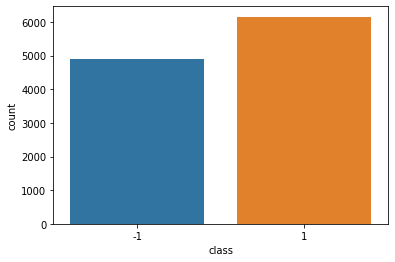

In [ ]:
print(df['class'].value_counts())
sns.countplot(df['class'])

The data seems pretty much balanced i.e. There is not a significant difference between the count of the target variable values.

In [ ]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2 

In [ ]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7737, 31)
(3317, 31)
(7737, 1)
(3317, 1)


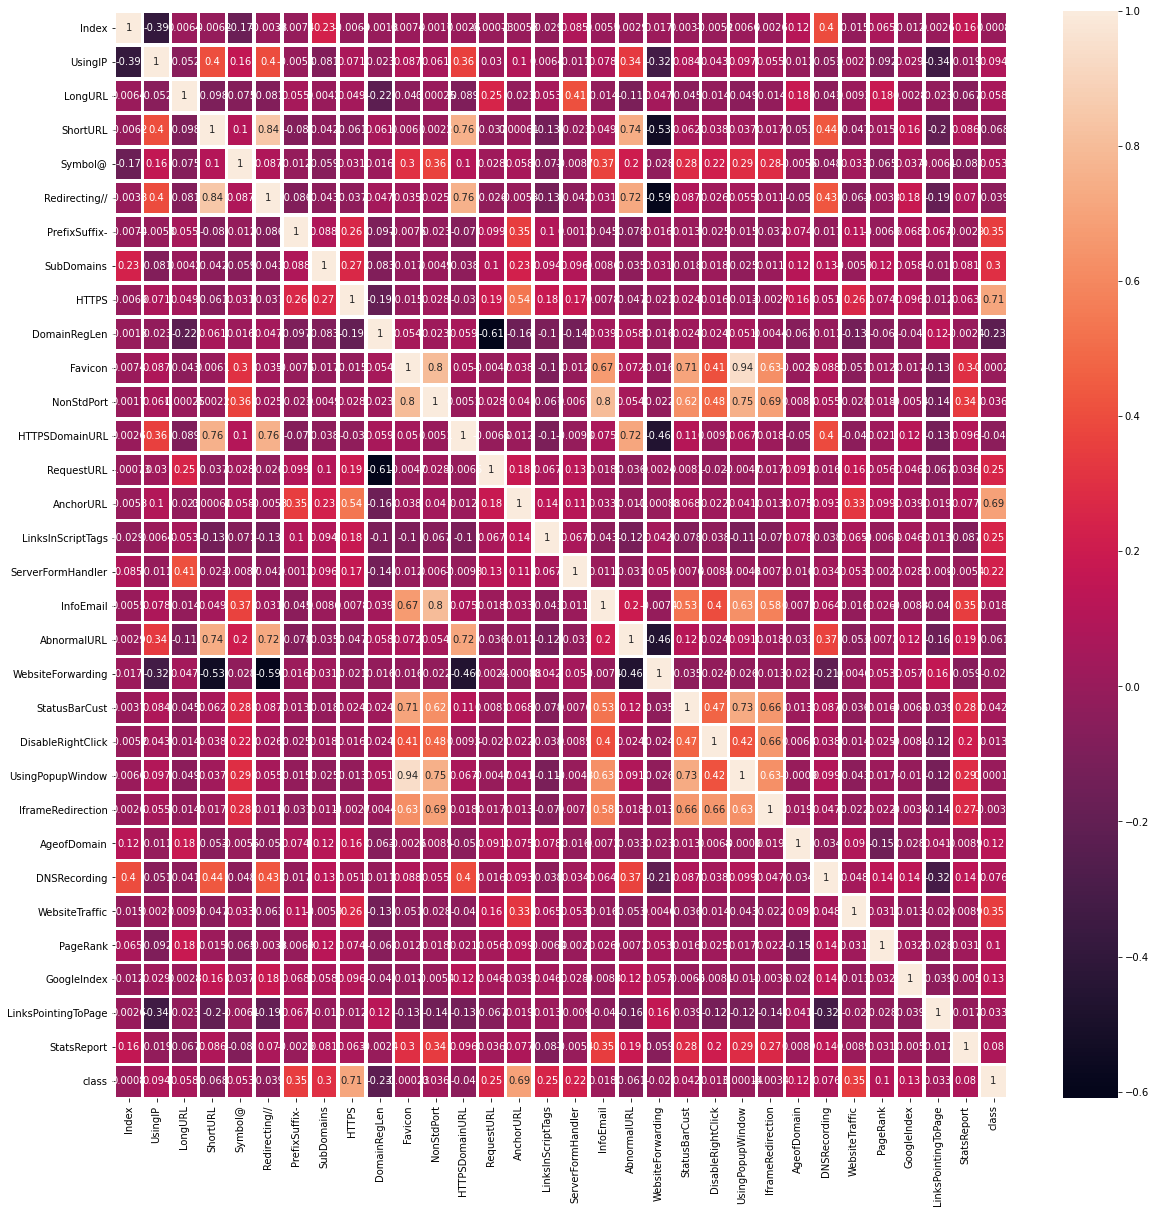

In [ ]:
corr = df.corr()
fig,ax= plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidth=2.5,ax=ax)

Lets apply Logistic Regression and check its accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)  

In [ ]:
logreg_predict= model_1.predict(test_X)

In [ ]:
accuracy_score(logreg_predict,test_Y)*100

92.7645462767561

In [ ]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.90      0.94      0.92      1400
           1       0.95      0.92      0.94      1917

    accuracy                           0.93      3317
   macro avg       0.92      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



In [ ]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

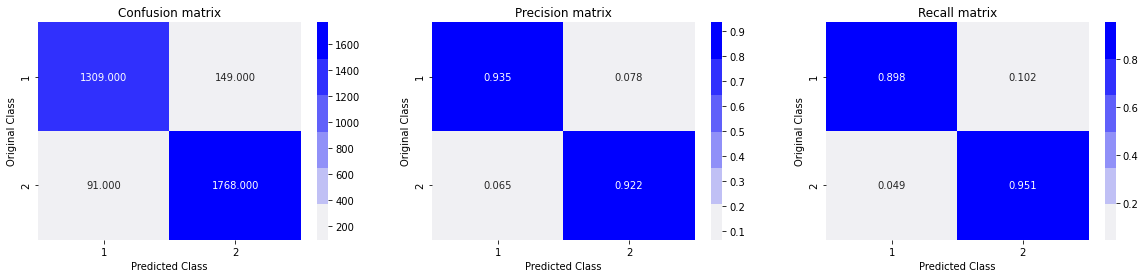

In [ ]:
plot_confusion_matrix(test_Y, logreg_predict)

Lets apply K-Nearest Neighbors Classifier and check its accuracy

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
model_2= knn.fit(train_X,train_Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [ ]:
knn_predict=model_2.predict(test_X)

In [ ]:
accuracy_score(knn_predict,test_Y)*100

63.43081097377148

In [ ]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

          -1       0.58      0.59      0.59      1458
           1       0.68      0.67      0.67      1859

    accuracy                           0.63      3317
   macro avg       0.63      0.63      0.63      3317
weighted avg       0.63      0.63      0.63      3317



Lets apply Decision Tree Classifier and check its classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree=DecisionTreeClassifier()
model_3=dtree.fit(train_X,train_Y)

In [ ]:
dtree_predict=model_3.predict(test_X)
accuracy_score(dtree_predict,test_Y)*100

94.75429605064818

In [ ]:
print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.93      0.95      0.94      1414
           1       0.97      0.94      0.95      1903

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



Lets apply Random Forest Classifier and check its accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model_4=rfc.fit(train_X,train_Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
rfc_predict=model_4.predict(test_X)
accuracy_score(rfc_predict,test_Y)*100

97.10581851070245

In [ ]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.96      0.97      0.97      1434
           1       0.98      0.97      0.97      1883

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



Lets Apply SVM and check its accuracy

In [ ]:
from sklearn.svm import SVC
svc=SVC()
model_5=svc.fit(train_X,train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svm_predict=model_5.predict(test_X)
accuracy_score(svm_predict,test_Y)*100

56.04461863129334

In [ ]:
print(classification_report(svm_predict,test_Y)) 

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.56      0.72      3317

    accuracy                           0.56      3317
   macro avg       0.50      0.28      0.36      3317
weighted avg       1.00      0.56      0.72      3317



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Lets apply AdaBoost Classifier and check its accuracy

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_6=adc.fit(train_X,train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
adc_predict=model_6.predict(test_X)
accuracy_score(adc_predict,test_Y)*100

91.04612601748569

In [ ]:
print(classification_report(adc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.88      0.91      0.90      1403
           1       0.93      0.91      0.92      1914

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



Lets apply XGBoost Classifier and check its accuracy

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
model_7=xgb.fit(train_X,train_Y) 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
xgb_predict=model_7.predict(test_X)
accuracy_score(xgb_predict,test_Y)*100

94.72414832680133

In [ ]:
print(classification_report(adc_predict,test_Y))

In [ ]:
print('Logistic Regression Accuracy:',accuracy_score(logreg_predict,test_Y)*100)
print('K-Nearest Neighbour Accuracy:',accuracy_score(knn_predict,test_Y)*100)
print('Decision Tree Classifier Accuracy:',accuracy_score(dtree_predict,test_Y)*100)
print('Random Forest Classifier Accuracy:',accuracy_score(rfc_predict,test_Y)*100)
print('support Vector Machine Accuracy:',accuracy_score(svm_predict,test_Y)*100)
print('Adaboost Classifier Accuracy:',accuracy_score(adc_predict,test_Y)*100)
print('XGBoost Accuracy:',accuracy_score(xgb_predict,test_Y)*100 )

Logistic Regression Accuracy: 92.7645462767561
K-Nearest Neighbour Accuracy: 63.43081097377148
Decision Tree Classifier Accuracy: 94.75429605064818
Random Forest Classifier Accuracy: 97.10581851070245
support Vector Machine Accuracy: 56.04461863129334
Adaboost Classifier Accuracy: 91.04612601748569
XGBoost Accuracy: 94.72414832680133
